In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ODE Palooza

Y'all have worked with several different ODEs. We've learned that we can use phase space to investigate different potential families of solutions. We've learned how to read information from phase space for systems we are familiar with like a falling ball and the SHO. We've also learned how to use numerical integration to find trajectories of the system in time and in phase space. Today, you will investigate a new model. There's quite a few well-known models. 

Some of these models are listed below with links to Wikipedia articles describing them or the ideas related to them. *This is for reference, you don't need to read or understand anything deeply from these articles.*

A few 2nd order models:

1. [The Damped Pendulum](https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator): 

$$m\ddot{x} + b\dot{x} + kx = 0$$ 

2. [Double Well Potential:](https://en.wikipedia.org/wiki/Double-well_potential) 

$$\ddot{x} = x-x^3$$

3. [Van Der Pol Oscillator:](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) 

$$\dot{x}=y; \dot{y} = -x+y(1-x^2)$$

4. [Dipole Fixed Points:](https://en.wikipedia.org/wiki/Stability_theory) 

$$\dot{x} = 2xy; \dot{y} = y^2 - x^2$$

5. [Anharmonic Oscillator (Symmetric)](https://en.wikipedia.org/wiki/Anharmonicity) 

$$m\ddot{x} + b\dot{x} + k_1 x + k_2 x^3 = 0$$

6. [Duffing Oscillator:](https://en.wikipedia.org/wiki/Duffing_equation) 

$$\ddot{x} + x + \epsilon x^3=0$$

I want to let your group decide what you want to explore. But a little guidance when making those choices:

1. The Damped Pendulum is the example I am using below to show you how code works. I am not solving it or describing it much. That will be your job. You might choose this example if you don't want to make too many changes to code, but rather want to figure out how to make visualizations that explain what you are trying to do.
2. The remaining oscillators are relatively straightforward to implement in the code below if you break them into 1st order ODEs. Remember that you have to do that!
3. The models without parameter exploration are the Double Well, the Van Der Pol, and the Dipole fixed points. This might be the next easiest to work with because you don't have to manipulate or pass parameters.
4. There's a few of these models with parameters, you can choose those, but maybe look into reasonable values. These models are likely the most challenging in this assignment because you have to keep track of and pass parameters.
5. Finally, some of these models have a time depdendent component, i.e., some $F(t)$. We are neglecting that for now and will come back to it in ODE Palooza 2 - Electric Boogaloo. 

A few 2nd order models:

1. [The Damped Pendulum](https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator): 
$$m\ddot{x} + b\dot{x} + kx = 0$$ 
2. [Anharmonic Oscillator (Symmetric)](https://en.wikipedia.org/wiki/Anharmonicity) 
$$m\ddot{x} + b\dot{x} + k_1 x + k_2 x^3 = 0$$
3. [Double Well Potential:](https://en.wikipedia.org/wiki/Double-well_potential) 
$$\ddot{x} = x-x^3$$
4. [Van Der Pol Oscillator:](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) 
$$\dot{x}=y; \dot{y} = -x+y(1-x^2)$$
5. [Dipole Fixed Points:](https://en.wikipedia.org/wiki/Stability_theory) 
$$\dot{x} = 2xy; \dot{y} = y^2 - x^2$$
6. [Duffing Oscillator:](https://en.wikipedia.org/wiki/Duffing_equation) 
$$\ddot{x} + x + \epsilon x^3=0$$

## Integrators

We worked with Euler-Cromer, RK2, and RK4. Below is that same code (corrected) and generalized that you are free to use and modify in your explorations. It is called just like before.

In [6]:
def EC(y_arr, vy_arr, deltat, *args):
    '''EC performs an Euler Cromer integration for the model
    placed in the main loop. There are several checks in place
    to make sure that EC has what it needs before running.
    Think about these kinds fo checks when doing your work.
    
    We use argv to pass variable arguments to the derivative solver'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0, N*deltat, N)
        
        ## The core of the EC algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## ONLY THING CHANGED!!!!!
            dy_dt, dvy_dt = DeriveModel2ndOrder(y_arr[i], vy_arr[i], args)
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+dy_dt*deltat, vy_arr[i]+dvy_dt*deltat
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')

def RK2(y_arr, vy_arr, deltat, *args):
    '''RK2 performs an 2nd order Runge Kutta integration for the model
    placed in the main loop. There are several checks in place
    to make sure that RK2 has what it needs before running.
    Think about these kinds fo checks when doing your work.'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0, N*deltat, N)
        
        
        ## The core of the RK algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## It's two steps now
            k1_y, k1_vy = DeriveModel2ndOrder(y_arr[i], vy_arr[i], args)
            k1_y, k1_vy = k1_y*deltat, k1_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k2_y, k2_vy = DeriveModel2ndOrder(y_arr[i]+0.5*k1_y, vy_arr[i]+0.5*k1_vy, args)
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+k2_y*deltat, vy_arr[i]+k2_vy*deltat
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')
        
def RK4(y_arr, vy_arr, deltat, *args):
    '''RK4 performs an 4th order Runge Kutta integration for the model
    placed in the main loop. There are several checks in place
    to make sure that RK4 has what it needs before running.
    Think about these kinds fo checks when doing your work.'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0, N*deltat, N)
        
        
        ## The core of the RK algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## It's four steps now
            k1_y, k1_vy = DeriveModel2ndOrder(y_arr[i], vy_arr[i], args)
            k1_y, k1_vy = k1_y*deltat, k1_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k2_y, k2_vy = DeriveModel2ndOrder(y_arr[i]+0.5*k1_y, vy_arr[i]+0.5*k1_vy, args)
            k2_y, k2_vy = k2_y*deltat, k2_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k3_y, k3_vy = DeriveModel2ndOrder(y_arr[i]+0.5*k2_y, vy_arr[i]+0.5*k2_vy, args)
            k3_y, k3_vy = k3_y*deltat, k3_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k4_y, k4_vy = DeriveModel2ndOrder(y_arr[i]+k3_y, vy_arr[i]+k3_vy, args)
            k4_y, k4_vy = k4_y*deltat, k4_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+(1.0/6)*(k1_y+2*k2_y+2*k3_y+k4_y), vy_arr[i]+(1.0/6)*(k1_vy+2*k2_vy+2*k3_vy+k4_vy)
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')
    

## Defining the derivatives

Much of what we have to do to use these integrators is to write our differential equation in a way the computer understands. We are doing that below with the same code we have used in the past, but generalized to work with different models and different arguments. You can turn on the SHO or the Damped Harmonic Oscillator model.

In [7]:
def DeriveModel2ndOrder(x, vx, *args):
    '''DeriveModel2ndOrder can be a general solver 
    where it takes an array of values for the DiffyQ
    and any arguments that you decide to use. Two examples appear below.
    
    Returns dx_dt and dvx_dt in that order'''
    
    ## Compute the changes; the notation is derviative of thing
    ## underscore with respect to variable, so dvy_dt means
    ## derivative of vy with respect to t
    model = 2
    
    if model == 1:
            
        ## SHO with g and l as parameters
        dvx_dt = -args[0][0]/args[0][1]*x  ## Here we make note that the order of the arguments matters
        dx_dt = vx

    elif model == 2:
        
        ## LAP with g and l as parameters
        dvx_dt = -args[0][0]/args[0][1]*np.sin(x) ## Here we make note that the order of the arguments matters
        dx_dt = vx
        
    
    ## Returns position change/dt then velocity change/dt
    return dx_dt, dvx_dt

## Call the code

These are the same calls we made to implement our integrators and plot

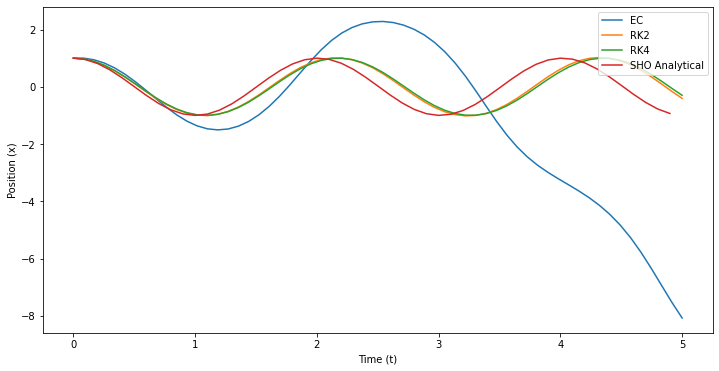

In [8]:
## Setup time

t0 = 0
tf = 5
N = 60
deltat = (tf-t0)/N

## Setup parameters (feel free to adjust)
g = 9.8
l = 1

## Create arrays for the anaylsis
x_arr_EC = np.zeros(N)
vx_arr_EC = np.zeros(N)
x_arr_RK2 = np.zeros(N)
vx_arr_RK2 = np.zeros(N)
x_arr_RK4 = np.zeros(N)
vx_arr_RK4 = np.zeros(N)

x0 = 1
vx0 = 0

x_arr_EC[0] = x0
x_arr_RK2[0] = x0
x_arr_RK4[0] = x0


## Run our code
t_arr_EC, x_arr_EC, vx_arr_EC = EC(x_arr_EC, vx_arr_EC, deltat, g, l, t0)
t_arr_RK2, x_arr_RK2, vx_arr_RK2 = RK2(x_arr_RK2, vx_arr_RK2, deltat,  g, l, t0)
t_arr_RK4, x_arr_RK4, vx_arr_RK4 = RK4(x_arr_RK4, vx_arr_RK4, deltat,  g, l, t0)


## Plot figures
fig = plt.figure(figsize=(12,6))

plt.plot(t_arr_EC,x_arr_EC, label='EC')
plt.plot(t_arr_RK2,x_arr_RK2, label='RK2')
plt.plot(t_arr_RK4,x_arr_RK4, label='RK4')

t = np.arange(0,5,0.1)
plt.plot(t, x0*np.cos(np.sqrt(g/l)*t), label='SHO Analytical')

plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.legend(loc=1)

## Using ODEint

SciPy has a builtin integrator that does a better job than we might hope to do in most cases. It's also relatively straightforward to implement now that we know how to write differential equations in code. Below, we write the differential equation for the damped oscillator



In [9]:
from scipy.integrate import odeint

def DampedOscModel(X, t, beta, omega0):
    
    x, vx = X[0], X[1]
    
    dx = vx
    dv = -2 * beta * vx - omega0**2 * x
    
    return [dx, dv]

Below we specify the initial conditions and parameter values that are fixed.

In [10]:
# initial state (let go from rest)
x0 = [1.0, 0.0]

# time coordinate to solve the ODE for
t = np.linspace(0, 10, 1000)
omega0 = 2*np.pi*1.0

We call ```odeint``` with the arguments that we have to get results.

In [11]:
# solve the ODE problem for three different values of the damping ratio

x1 = odeint(DampedOscModel, x0, t, args=(0.0, omega0)) # undamped
x2 = odeint(DampedOscModel, x0, t, args=(0.2, omega0)) # under damped
x3 = odeint(DampedOscModel, x0, t, args=(1.0, omega0)) # critial damping
x4 = odeint(DampedOscModel, x0, t, args=(5.0, omega0)) # over damped

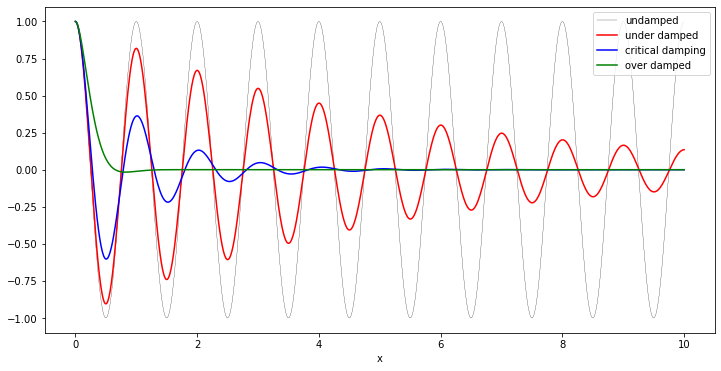

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t, x1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, x2[:,0], 'r', label="under damped")
ax.plot(t, x3[:,0], 'b', label=r"critical damping")
ax.plot(t, x4[:,0], 'g', label="over damped")
plt.xlabel('t')
plt.xlabel('x')
ax.legend(loc = 1);

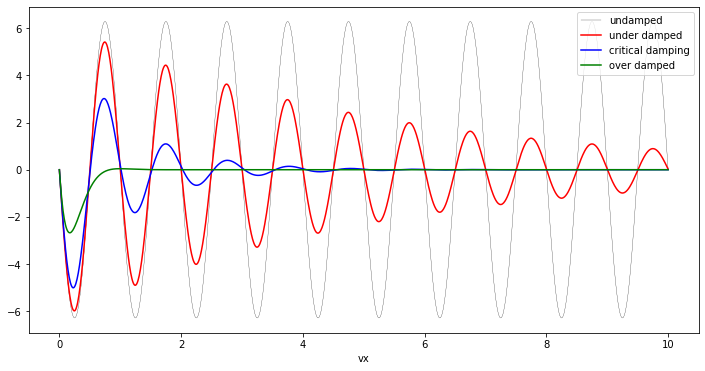

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t, x1[:,1], 'k', label="undamped", linewidth=0.25)
ax.plot(t, x2[:,1], 'r', label="under damped")
ax.plot(t, x3[:,1], 'b', label=r"critical damping")
ax.plot(t, x4[:,1], 'g', label="over damped")
plt.xlabel('t')
plt.xlabel('vx')
ax.legend(loc = 1);